**Objective:**

To create a fraud detection system(model) to predict fraud from the data provided on kaggle https://www.kaggle.com/shivamb/vehicle-claim-fraud-detection

In [1]:
#Importing the libraries

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
#importing the dataset
df = pd.read_csv('fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [33]:
#checking if there are any missing values in this dataset
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

<AxesSubplot:>

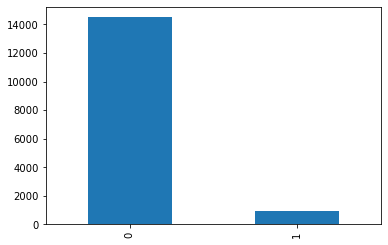

In [4]:
#Analyse the target variable
df.FraudFound_P.value_counts().plot.bar()

As per the visualiation above, the target variable is 'severe' imbalanced. Thus, will use SMOTE technique to balance out the dataset at the later stage.

# Data Preprocessing

Will remove some of the columns like 'PolicyNumber', 'RepNumber' as these are the IDs that not useful later part of modelling

In [5]:
data=df.drop(['PolicyNumber','RepNumber','Age'],axis=1)
columns = data.columns
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [6]:
# Turn Categorical Features values into numeric

from sklearn.preprocessing import LabelEncoder

discrete_columns = []

for col in columns:
    if data[col].dtypes == 'object':
        discrete_columns.append(col)

for col in discrete_columns:
    enc = LabelEncoder()
    values = data[col].unique()
    enc_fit = enc.fit(values)
    data[col] = enc_fit.transform(data[col])

In [7]:
#View the dataset after the transformation
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,1,3,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


Balance the dataset using SMOTE

In [9]:
y = data['FraudFound_P']
X = data.drop('FraudFound_P',axis=1)

import joblib
from collections import Counter
from imblearn.over_sampling import SMOTEN
smt = SMOTEN(random_state=45, k_neighbors=5)
X_resampled_sm, y_resampled_sm = smt.fit_resample(X,y)
print(f"Total length of len:{len(X_resampled_sm)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_sm).items())}") 

Total length of len:28994
New Distribution of out target label:[(0, 14497), (1, 14497)]


Normalise the dataset using MinMaxScalar

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trans= scaler.fit_transform(X_resampled_sm)

Split the dataset into training set and testing set in the proportion of 70%:30%

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_trans,y_resampled_sm,test_size = 0.3,random_state = 42)

# Model Selection

In [12]:
def model_selection(X_train, Y_train):
    models = []
    models.append(('RFC', RandomForestClassifier()))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('GBR', GradientBoostingClassifier()))
    models.append(('XGB', XGBClassifier()))
    models.append(('SVM', SVC()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Accuracy: %f " % (name, abs(cv_results.mean()))
        print(msg)

In [13]:
#choose the model based on highest accuracy
model_selection(X_train, y_train)

RFC: Accuracy: 0.964868 
ADA: Accuracy: 0.840601 
KNN: Accuracy: 0.902587 
CART: Accuracy: 0.930919 
GBR: Accuracy: 0.880168 
XGB: Accuracy: 0.949988 
SVM: Accuracy: 0.893521 


In [16]:
from sklearn.metrics import accuracy_score

# Instantiating the random forest classifier with the default parameters.
rfc = RandomForestClassifier()

# Training the model
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)
train_predictions = rfc.predict(X_train)


RF_train_SCORE=accuracy_score(y_train, train_predictions)
print("\nTrain Accuracy using sklearn RF model:",
RF_train_SCORE)
RF_test_SCORE=accuracy_score(y_test, predictions)
print("\nTest Accuracy using sklearn RF model:",
RF_test_SCORE)


Train Accuracy using sklearn RF model: 1.0

Test Accuracy using sklearn RF model: 0.9666628348085987


In [17]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix,classification_report

# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4338
           1       0.99      0.95      0.97      4361

    accuracy                           0.97      8699
   macro avg       0.97      0.97      0.97      8699
weighted avg       0.97      0.97      0.97      8699



In [18]:
# Confusion Matrix
print(confusion_matrix(y_test, predictions))

[[4276   62]
 [ 228 4133]]


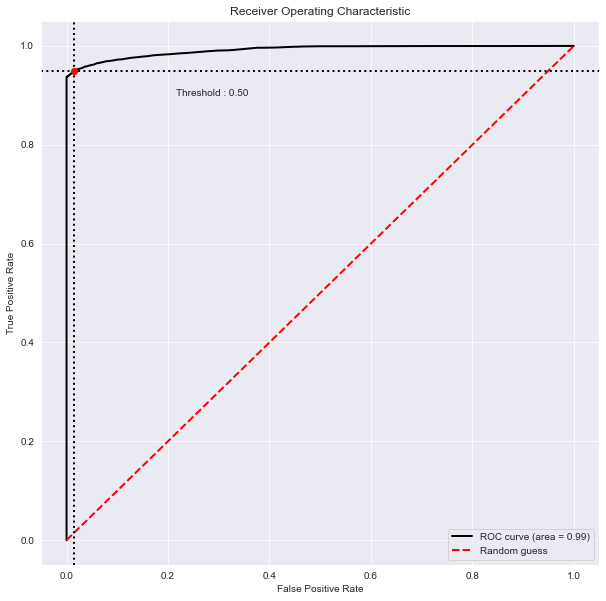

In [32]:
# Use predict_proba to predict probability of the class
y_pred = rfc.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

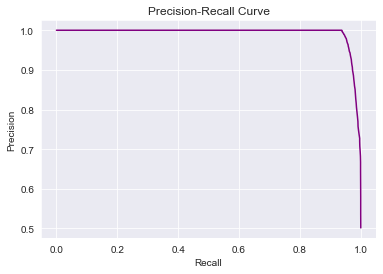

In [39]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Features Importance

In [19]:
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

Fault                   0.097911
BasePolicy              0.081422
MonthClaimed            0.060847
PolicyType              0.060396
AgeOfPolicyHolder       0.060358
DayOfWeek               0.055148
Month                   0.050929
Make                    0.049230
WeekOfMonth             0.046376
MaritalStatus           0.044381
DayOfWeekClaimed        0.043348
WeekOfMonthClaimed      0.042265
AgeOfVehicle            0.036722
Year                    0.035661
DriverRating            0.032873
PastNumberOfClaims      0.032797
VehiclePrice            0.032383
NumberOfSuppliments     0.030403
VehicleCategory         0.024840
AddressChange_Claim     0.024643
Deductible              0.016995
NumberOfCars            0.012770
Sex                     0.010405
AccidentArea            0.009607
PoliceReportFiled       0.004273
Days_Policy_Accident    0.001200
AgentType               0.001195
Days_Policy_Claim       0.000340
WitnessPresent          0.000281
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


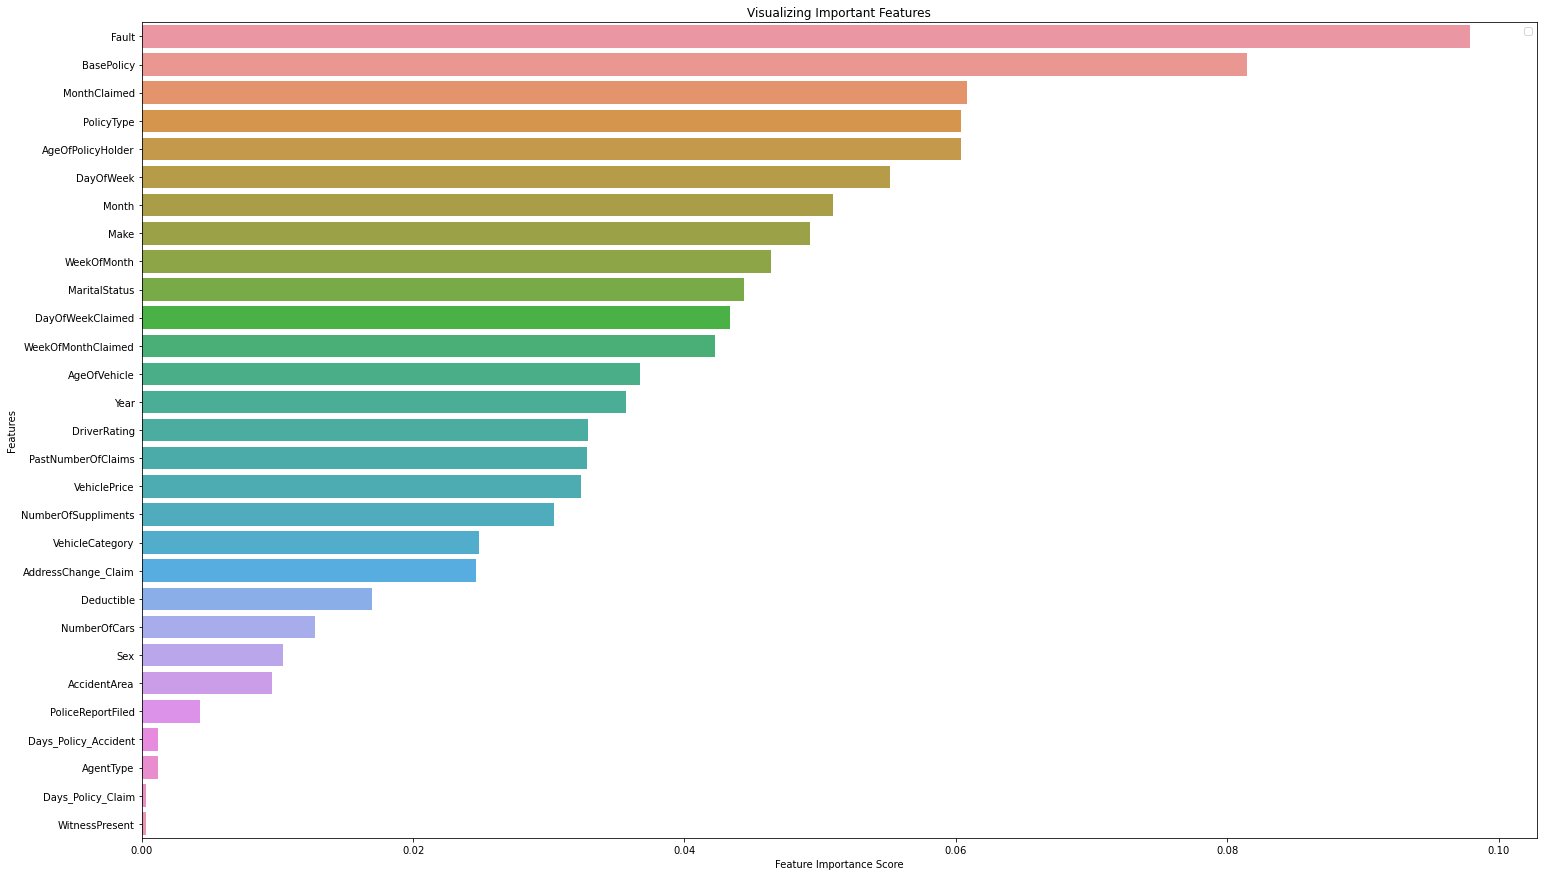

In [24]:
# Creating a bar plot
plt.figure(figsize=(25,15))
sns.barplot(x=feature_imp, 
            y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Based on the visualiation above, the top 5 variables are:</br>

Fault</br>

BasePolicy</br>

MonthClaimed</br>

PolicyType</br>

AgeOfPolicyHolder